In [23]:
#Import necessary packages:
import numpy as np
from NN import layers

#Import the data: AND EXAMPLE:
#stored separately and imported here
# as a matrix of X and a *column vector* for the y's
import NN.data as data

#for scoring and analysis:
import matplotlib.pyplot as plt
from NN.metrics import BCE, accuracy

### Define:

 - the training data, first using the `AND` case
 - the `learning_rate`
 - the `Linear` layer:
 - the classification threshold probability (if $0.50<p\leq 1$, then the model returns `TRUE`)

In [24]:
X_train , y_train = data.split_data(data.d['AND'])
lr=0.01
linear_layer = layers.Linear(num_features=X_train.shape[1], num_neurons=1)
threshold = 0.5

### 1) Input data `X_train` to linear layer:

In [25]:
output = linear_layer.forward(X_train)
output

array([[0.36568144],
       [0.31501946],
       [0.54009871],
       [0.48369896]])

### 1a) Make some predictions.  At first pass through the neural network, these are not meaningful because we haven't made any effort to decrease the loss function.

In [26]:
#"predictions"
#assumed to be meaningless at first pass:
output>threshold

array([[False],
       [False],
       [ True],
       [False]])

In [27]:
#actuals
y_train!= 0

array([[False],
       [False],
       [False],
       [ True]])

### 2) Compute the Binary Cross Entropy Loss:

In [28]:
loss = BCE(y_true=y_train , y_pred = output)
loss

0.584151198455769

### 3) Compute Gradients

 - The derivations of these gradients is completed in the readme

In [29]:
d_output = output - y_train
dz = d_output * (output) * (1-output)
d_weights = np.dot(X_train.T, dz).T
d_bias = np.mean(dz , axis= 0)

### 4) Update the weights:

In [30]:
linear_layer.weights -= lr*d_weights
linear_layer.bias -= lr*d_bias

### 5) Repeat Steps 1 through 4 a large number of times.  Take note of how the loss function progresses and what happens to prediction accuracy after training is complete:

In [31]:




num_epochs = 100000 
plot_data = np.zeros((3,num_epochs))
#first row: epoch number
plot_data[0,:] = np.array(range(num_epochs))
#second row: loss
#third row: accuracy
for epoch in range(num_epochs):
    #STEP 1:
    output = linear_layer.forward(X_train)
    #STEP 2:
    loss = BCE(y_true=y_train , y_pred = output)
    #STEP 3:
    d_output = output - y_train
    dz = d_output * (output) * (1-output)
    d_weights = np.dot(X_train.T, dz).T
    d_bias = np.mean(dz , axis= 0)
    #STEP 4:
    linear_layer.weights -= lr*d_weights
    linear_layer.bias -= lr*d_bias
    #Append plot data:
    plot_data[1,epoch]  =   loss
    plot_data[2,epoch]  =   accuracy(y_true=y_train , y_pred = output>threshold)
    #Give periodic updates on the loss function:
    if epoch % 10000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")
        #weights gradient apppears to be getting stuck
        #print(f'd_weights at epoch {epoch}: {d_weights}')
#how many epochs reuiqred for perfect training accuracy?
indices = np.where(accuracy == 1)[0]  # Get indices where accuracy == 1
first_index = indices[0] if indices.size > 0 else None  # Get first occurrence safely


Epoch 0, Loss: 0.5841
Epoch 10000, Loss: 0.2750
Epoch 20000, Loss: 0.1982
Epoch 30000, Loss: 0.1594
Epoch 40000, Loss: 0.1354
Epoch 50000, Loss: 0.1190
Epoch 60000, Loss: 0.1069
Epoch 70000, Loss: 0.0977
Epoch 80000, Loss: 0.0903
Epoch 90000, Loss: 0.0843


/var/folders/m_/rctgptd96hld2b0lr9gqrd5c0000gn/T/ipykernel_12935/3428969313.py:29: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  indices = np.where(accuracy == 1)[0]  # Get indices where accuracy == 1


### Plot the results of the loss function.  We want to see it decreasing monotonically.

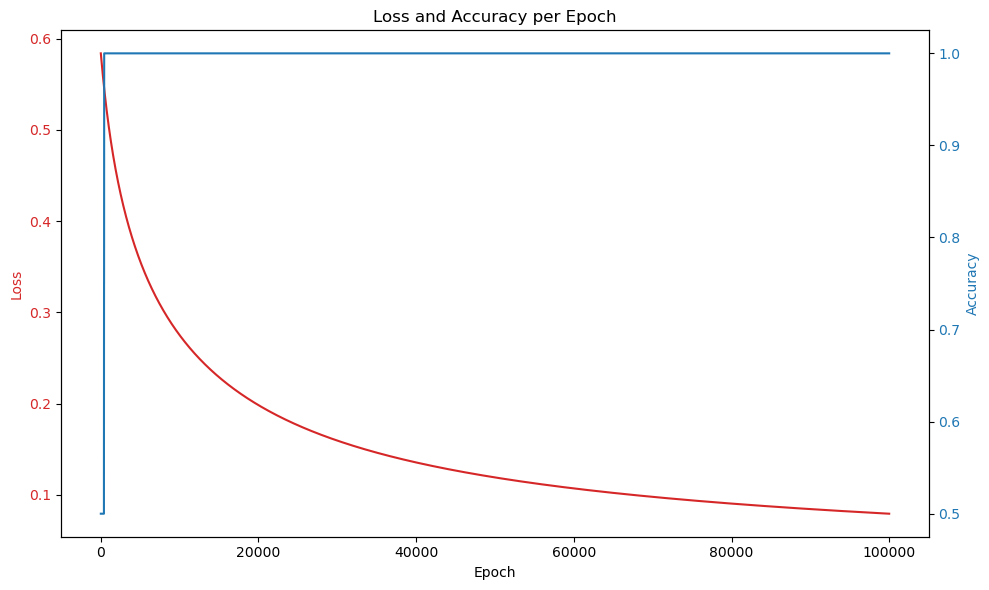

In [32]:
#prepare the plot data:
epochs , loss , accuracy = plot_data

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot loss on the primary y-axis (left)
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(epochs, loss, color=color, label='Loss')
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for accuracy
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)  
ax2.plot(epochs, accuracy, color=color, label='Accuracy')
ax2.tick_params(axis='y', labelcolor=color)

# Optional: add a title and grid
plt.title('Loss and Accuracy per Epoch')
fig.tight_layout()  # Adjust layout to prevent clipping of ylabel

# Show the plot
plt.show()

In [33]:
try:
    print(f'This try: {np.min(np.where(accuracy==1)) + 1} epochs to get 100% training accuracy')
except ValueError:
    print(f'100% training accuracy not achieved in {num_epochs} epochs')

This try: 415 epochs to get 100% training accuracy


The loss function decreases monotonically and the network has learned the `AND` operator with 100% accuracy.  We can see above that even though the loss function continues to decrease, it doesn't really improve predictive power.

We still require a lot of computation to observe perfect accuracy here.  It takes between 850-900 epochs before the first instance of 100 percent accuracy: and this is one of the simplest concepts a neural network could learn!